# Analiza slovenskih državnih tekmovanj v sestavljanju 3x3 rubikove kocke

## Uvod

Najprej uvozimo potrebne knjižnice in si pripravimo podatke:

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Preberemo csv datoteko in shranimo podatke v spremenljivko
podatki = pd.read_csv("datoteke/csv/SlovenianNationals.csv", index_col = "Mesto")

# Podatki s časi so shranjeni kot tip object, zato jih spremenimo v numeric, rezultati DNF so zdaj zapisani kot NaN
podatki["Single"] = pd.to_numeric(podatki["Single"], errors = "coerce")
podatki["Average"] = pd.to_numeric(podatki["Average"], errors = "coerce")

# Podatki o državah so shranjeni v nestandardnem formatu, zato jih ročno pretvorimo s slovarjem
def convert_imena_drzav(drzava):
    mapping = {
        "si" : "SLO",
        "hr" : "CRO",
        "at" : "AUT",
        "ba" : "BIH",
        "bg" : "BEL",
        "ca" : "CAN",
        "de" : "GER",
        "es" : "ESP",
        "fr" : "FRA",
        "gb" : "GBR",
        "hu" : "HUN",
        "ie" : "IRL",
        "iq" : "IRQ",
        "it" : "ITA",
        "nl" : "NED",
        "pl" : "POL",
        "rs" : "SRB",
        "ru" : "RUS",
        "sk" : "SVK",
        "ua" : "UKR",
        "xk" : "KOS"

    }
    return mapping.get(drzava, drzava)
podatki["Drzava"] = podatki["Drzava"].apply(convert_imena_drzav)
Leta = [2019,2022,2023,2024,2025]

## Sestava tekmovanj

Najprej si oglejmo obiskanost tekmovanj po letih. Opazimo, da so tekmovanja vsako leto večja in da se je v obdobju korone povečal interes, kljub temu da takrat ni bilo nobenih tekmovanj.

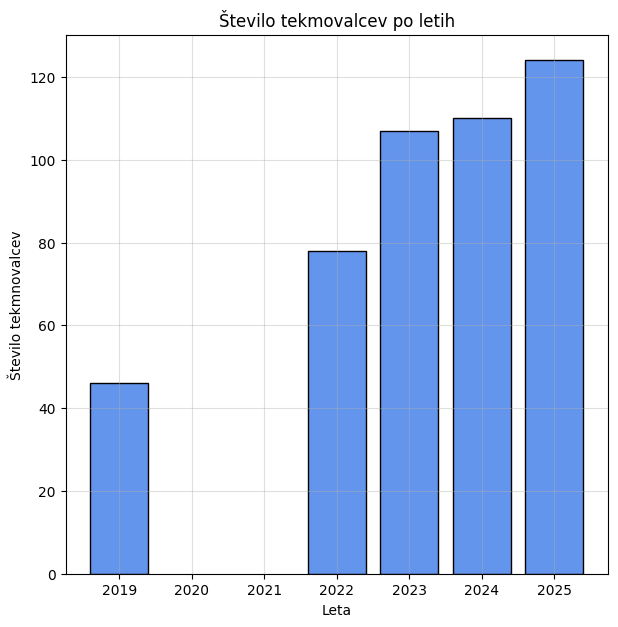

In [248]:
f_r1 = podatki["ImeRunde"] == "3x3x3 Cube First round" # Filtriramo ven samo prvo rundo, da se vsak tekmovalec pojavi le enkrat

st_tekmovalcev = podatki[f_r1].groupby("Leto").size()

# Nastavitve za graf
plt.figure(figsize=(7, 7))
plt.bar(Leta, st_tekmovalcev, color = "cornflowerblue", edgecolor = "black")
plt.title("Število tekmovalcev po letih")
plt.xlabel("Leta")
plt.ylabel("Število tekmnovalcev")
plt.grid(True, alpha = 0.4)
plt.show()

Zdaj si oglejmo še zastopanost držav v letih 2019 in 2024 in 2025. Opazimo, da so v letih 2019 - 2024 slovenci predstavljali občutno večji delež tekmovanja kot v letu 2025. To se opazi tudi na tekmovanjih, kjer so obvestila zdaj podana dvojezično, t.j. v angleščini in slovenščini. Prav tako to kaže na mednarodno priznanost slovenskih tekmovanj.

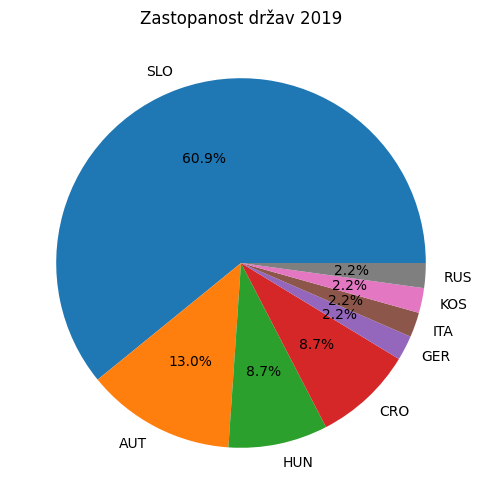

In [249]:
f_2019 = podatki["Leto"] == 2019
f_2019_r1 = f_2019 & f_r1 # Filtriramo ven prvo rundo leta 2019

podatki_za_graf = podatki[f_2019_r1].groupby("Drzava").size().sort_values(ascending = False)

plt.figure(figsize=(6, 6))
plt.pie(podatki_za_graf, labels = podatki_za_graf.index, autopct = "%1.1f%%") # Autopct nam napiše odstotke na graf
plt.title("Zastopanost držav 2019")
plt.show()

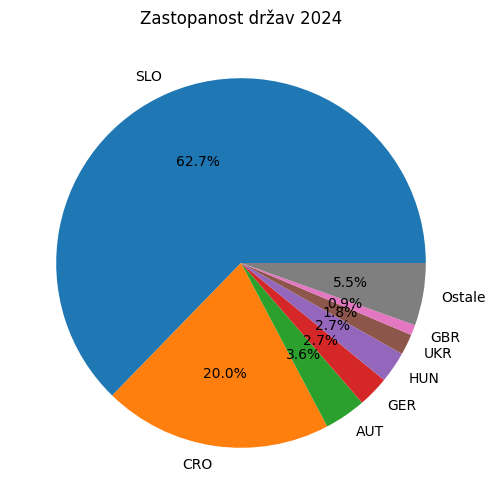

In [250]:
f_2024 = podatki["Leto"] == 2024
f_2024_r1 = f_2024 & f_r1

zastopanost = podatki[f_2024_r1].groupby("Drzava").size().sort_values(ascending = False)

# Na grafu napišemo le prvih 7 držav, preostale seštejemo v košček ostale
prvih_7 = zastopanost.head(7)
ostale = zastopanost[7:].sum()
podatki_za_graf = prvih_7.copy()
podatki_za_graf["Ostale"] = ostale

plt.figure(figsize=(6, 6))
plt.pie(podatki_za_graf, labels = podatki_za_graf.index, autopct = "%1.1f%%")
plt.title("Zastopanost držav 2024")
plt.show()

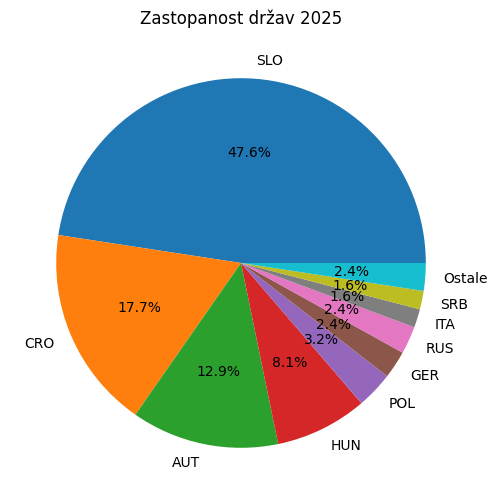

In [251]:
f_2025 = podatki["Leto"] == 2025
f_2025_r1 = f_2025 & f_r1

zastopanost = podatki[f_2025_r1].groupby("Drzava").size().sort_values(ascending = False)
prvih_9 = zastopanost.head(9)
ostale = zastopanost[9:].sum()

podatki_za_graf = prvih_9.copy()
podatki_za_graf["Ostale"] = ostale

plt.figure(figsize=(6, 6))
plt.pie(podatki_za_graf, labels = podatki_za_graf.index, autopct = "%1.1f%%")
plt.title("Zastopanost držav 2025")
plt.show()

Zdaj si oglejmo še vsa leta skupaj združena v eno pito. Opazimo, da prevladuje predvsem Slovenija, sledijo pa ji hrvaška, madžarska in avstrijska zasedba.

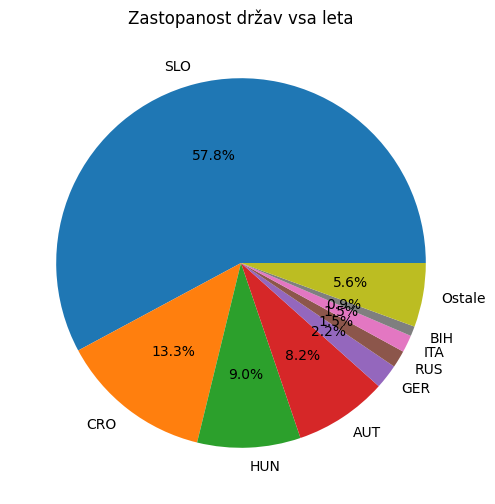

In [252]:
zastopanost = podatki[f_r1].groupby("Drzava").size().sort_values(ascending = False)
prvih_8 = zastopanost.head(8)
ostale = zastopanost[8:].sum()

podatki_za_graf = prvih_8.copy()
podatki_za_graf["Ostale"] = ostale

plt.figure(figsize=(6, 6))
plt.pie(podatki_za_graf, labels = podatki_za_graf.index, autopct = "%1.1f%%")
plt.title("Zastopanost držav vsa leta")
plt.show()

## Pregled časov

Zanima nas koliko so se ljudje izboljšali v zadnjih nekaj letih. Dober pokazatelj tega je zmagovalno povprečje in njegov pripadajoči najhitrejši čas.

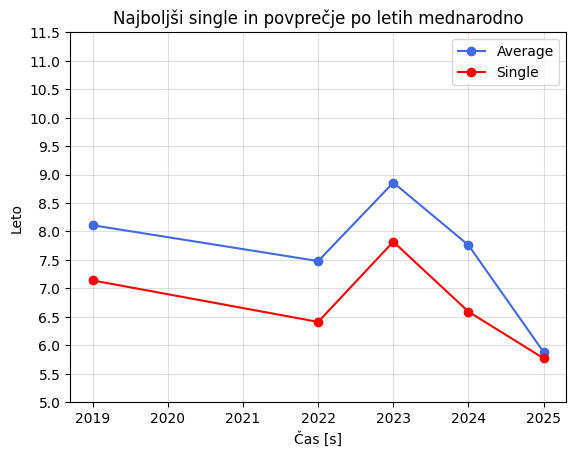

       Average  Single  Leto
Mesto                       
1         8.11    7.14  2019
1         7.48    6.41  2022
1         8.86    7.82  2023
1         7.76    6.59  2024
1         5.88    5.77  2025


In [253]:
f_finali = podatki["ImeRunde"] == "3x3x3 Cube Final"

finali = podatki[f_finali]
manjsi_finali = finali[["Average", "Single", "Leto"]].copy()
najboljsi = manjsi_finali.groupby("Leto").head(1)

graf_m = pd.DataFrame(najboljsi)
graf_m = graf_m.set_index("Leto")

graf_m.plot(y = ["Average", "Single"], color = ["royalblue", "red"], marker = "o")
plt.title("Najboljši single in povprečje po letih mednarodno")
plt.xlabel("Čas [s]")
plt.ylabel("Leto")
yticks = np.arange(5, 12, 0.5)
plt.yticks(yticks)
plt.grid(True, alpha = 0.4)
plt.show()

# Podatki so pregledni tudi v tabeli
print(najboljsi)

Toda večino teh rezultatov pripada tujim tekmovalcem, oglejmo si še isti graf, kjer vzamemo najboljši slovenskih čas iz finalov:

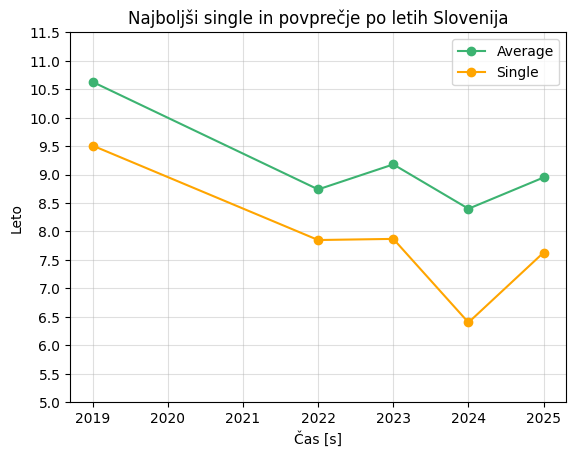

       Average  Single  Leto
Mesto                       
5        10.63    9.51  2019
2         8.74    7.85  2022
4         9.18    7.87  2023
4         8.40    6.40  2024
9         8.95    7.63  2025


In [254]:
f_slo = podatki["Drzava"] == "SLO"
f_finali = podatki["ImeRunde"] == "3x3x3 Cube Final"
f_slo_finali = f_slo & f_finali

slo_finali = podatki[f_slo_finali]
manjsi_finali = slo_finali[["Average", "Single", "Leto"]].copy()
najboljsi = manjsi_finali.groupby("Leto").head(1)

graf_s = pd.DataFrame(najboljsi)
graf_s = graf_s.set_index("Leto")

graf_s.plot(y = ["Average", "Single"], color = ["mediumseagreen", "orange"], marker = "o")
plt.title("Najboljši single in povprečje po letih Slovenija")
plt.xlabel("Čas [s]")
plt.ylabel("Leto")
yticks = np.arange(5, 12, 0.5)
plt.yticks(yticks)
plt.grid(True, alpha = 0.4)
plt.show()

# Podatki so pregledni tudi v tabeli
print(najboljsi)

Če grafa združimo lahko opazimo, da Slovenci še nismo na nivoju nekaterih naših sosedov:

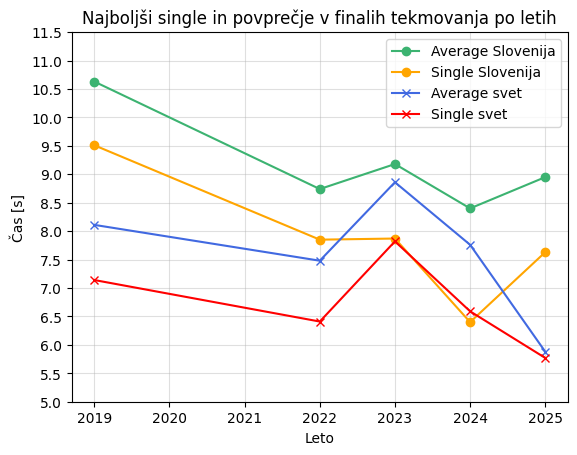

In [256]:
# Preimenujemo podakte za preglednost
graf1 = graf_s.rename(columns = {"Average" : "Average Slovenija", "Single" : "Single Slovenija"})
graf2 = graf_m.rename(columns = {"Average" : "Average svet", "Single" : "Single svet"})

# Narišemo prvi graf
ax = graf1.plot(marker = "o", color = ["mediumseagreen", "orange"], label = graf1.columns)

# Na isto os narišemo še drugi graf
graf2.plot(ax = ax, marker = "x", color = ["royalblue", "red"], label = graf2.columns)

yticks = np.arange(5, 12, 0.5)
ax.set_yticks(yticks)
ax.set_ylabel("Čas [s]")
ax.set_xlabel("Leto")
ax.set_title("Najboljši single in povprečje v finalih tekmovanja po letih")
ax.grid(True, alpha=0.4)
ax.legend()
plt.show()